In [21]:
import matplotlib.pyplot as plt
import numpy as np

tipo_codigo = "mpi"

In [22]:
fpaths = "../testes_seq_paral/test_staub_tudo_test_new_n/"

sizes = ["small", "medium", "large"]
threads = [2, 4, 8, 16]
threads_mpi_pthreads = [4, 6, 8, 10, 12, 18]
speedups = []

cpu_migrations = {}
cycles = {}

for i in sizes:
    for j in threads:
        cpu_migrations_local = []
        cycles_local = []
        paralelo_local = []
        # print(f"pthreads - {i} threads {j}")
        with open(f"{fpaths}logs_{tipo_codigo}/log_paralelo_{i}_{j}_out.txt", "r") as arquivo:
            for linha in arquivo:
                if "cpu-migrations" in linha:
                    aux = linha.split("cpu-migrations")
                    aux = aux[0]
                    cpu_migrations_local.append(float(aux))
            aux = np.mean(cpu_migrations_local)
            aux = {f"{i}, {j}": cpu_migrations_local}
            cpu_migrations.update(aux)

dados = []
label = []
for i in cpu_migrations:
    dados.append(cpu_migrations[i])
    label.append(i)


dados_media = []

for i in dados:
    dados_media.append(np.mean(i))

In [23]:
fpaths = "../testes_seq_paral/test_greff_tudo_test_new_n/"

sizes = ["small", "medium", "large"]
threads = [2, 4, 8, 16]
threads_mpi_pthreads = [4, 6, 8, 10, 12, 18]
speedups = []

cpu_migrations = {}
cycles = {}

for i in sizes:
    for j in threads:
        cpu_migrations_local = []
        cycles_local = []
        paralelo_local = []
        # print(f"pthreads - {i} threads {j}")
        with open(f"{fpaths}logs_{tipo_codigo}/log_paralelo_{i}_{j}_out.txt", "r") as arquivo:
            for linha in arquivo:
                if "cpu-migrations" in linha:
                    aux = linha.split("cpu-migrations")
                    aux = aux[0]
                    cpu_migrations_local.append(float(aux))
            aux = np.mean(cpu_migrations_local)
            aux = {f"{i}, {j}": cpu_migrations_local}
            cpu_migrations.update(aux)

dados = []
label2 = []
for i in cpu_migrations:
    dados.append(cpu_migrations[i])
    label2.append(i)


dados_media2 = []

for i in dados:
    dados_media2.append(np.mean(i))

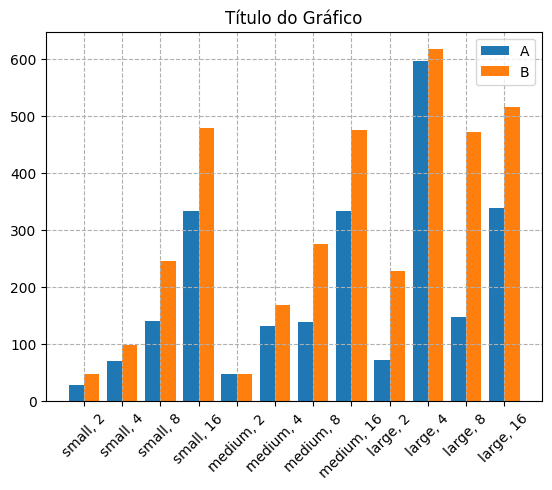

In [24]:
X_axis = np.arange(len(dados_media))

# Crie o gráfico de barras
fig, ax = plt.subplots()
ax.bar(X_axis - 0.2, dados_media, 0.4, label='A')
ax.bar(X_axis + 0.2, dados_media2, 0.4, label='B')

ax.set_xticks(X_axis)
ax.set_xticklabels(label)
ax.set_xticklabels(label, rotation=45)
ax.set_title("Título do Gráfico")
ax.legend()

# Adicione linhas de grade no fundo
ax.grid(linestyle='--')

plt.show()

In [39]:
pc_a = {}
pc_b = {}

for i, l in enumerate(label):
    aux = l.split(',')
    aux = f"{aux[0][0]}{aux[1].strip()}"
    pc_a.update({aux: dados_media[i]})
    pc_b.update({aux: dados_media2[i]})

In [50]:
print("PC_A")
for i in pc_a:
    print(f"({i},{round(pc_a[i])})",end=", ")
print("\nPC_B")
for i in pc_b:
    print(f"({i},{round(pc_b[i])})",end=", ")

PC_A
(s2,28), (s4,71), (s8,141), (s16,333), (m2,47), (m4,132), (m8,139), (m16,334), (l2,72), (l4,597), (l8,148), (l16,339), 
PC_B
(s2,47), (s4,99), (s8,247), (s16,479), (m2,48), (m4,169), (m8,277), (m16,476), (l2,229), (l4,617), (l8,472), (l16,516), 